In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [10]:

# Load your dataset
# df = pd.read_csv('../data/imbalanced_90_10.csv')

# X_imbalanced = df.drop(['id', 'Class'], axis=1).values  # Drop 'id' and 'Class' columns
# y_imbalanced = df['Class'].values

# # Normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_imbalanced = scaler.fit_transform(X_imbalanced)

# X_train = X_imbalanced[y_imbalanced == 1][:10000]
# Load your dataset
df = pd.read_csv('../data/creditcard_2023.csv')
smalldf = df.sample(n=10000)
X_imbalanced = smalldf.drop(['id', 'Class'], axis=1).values  # Drop 'id' and 'Class' columns
y_imbalanced = smalldf['Class'].values
X_train = X_imbalanced[y_imbalanced == 1]
print(X_train.shape)

(4965, 29)


In [79]:
dframe = pd.DataFrame(X_train)

In [80]:
dframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,...,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000,49823.000000
mean,-0.506762,0.491202,-0.680050,0.734459,-0.342497,-0.433234,-0.492767,0.150925,-0.588744,-0.672569,...,0.183441,0.099624,0.023144,0.005005,-0.125367,0.065341,0.069587,0.209760,0.103910,12101.492340
std,0.901217,1.013999,0.760846,0.683609,1.158574,1.042189,1.026723,1.373159,0.882014,0.828765,...,1.133364,1.369469,1.242421,1.256476,0.831236,1.133747,0.907394,1.286648,1.161124,6896.257558
min,-2.637362,-4.215050,-2.518046,-1.369576,-3.301131,-3.988017,-4.351283,-6.532979,-3.750965,-3.163128,...,-4.860277,-12.165524,-6.450353,-14.452018,-3.060251,-6.810179,-3.134266,-4.947034,-4.678912,50.950000
25%,-0.992557,-0.062883,-1.059735,0.219389,-0.896395,-1.055923,-0.996565,-0.171379,-1.130059,-1.098828,...,-0.294850,-0.054332,-0.457349,-0.313174,-0.685505,-0.500830,-0.521169,-0.249677,-0.263142,6168.195000
50%,-0.470142,0.314712,-0.640461,0.680332,-0.221058,-0.337221,-0.272772,-0.017675,-0.531379,-0.590933,...,0.115143,0.124852,-0.017050,-0.090103,-0.108883,0.029291,0.055095,0.263958,0.240575,12117.570000
75%,0.018500,0.856295,-0.190826,1.216267,0.282711,0.206490,0.148619,0.264065,0.006657,-0.222277,...,0.606533,0.360037,0.470965,0.211185,0.444517,0.611649,0.727193,0.750970,0.746312,18100.805000
max,1.845476,4.361219,2.192263,2.394164,9.193748,3.529467,3.830865,5.956513,3.325877,3.380819,...,9.276019,8.087080,9.768747,6.553262,2.442869,3.836984,4.622883,4.834397,4.147711,24039.480000


In [4]:
def build_discriminator(input_dim):
    model = Sequential([
        # Input layer with 128 units
        layers.Input(shape=(input_dim,)),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        
        # Second hidden layer with 64 units
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.2),
        
        # Third hidden layer with 32 units
        layers.Dense(64),
        layers.LeakyReLU(alpha=0.2),
        
        # Output layer with a single unit (real or fake)
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

# Example usage:
input_dim = 29  # Number of features in the dataset
discriminator = build_discriminator(input_dim)

# Compile the model
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Print the model summary
discriminator.summary()


C:\Users\mirot\Documents\Data_Science\AI_Data_Augmentation\env\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           7,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def build_generator(latent_dim, output_dim):
    model = Sequential([
        # Input layer (latent space)
        layers.Input(shape=(latent_dim,)),
        
        # First hidden layer with 64 units
        layers.Dense(64),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(momentum=0.8),
        
        # Second hidden layer with 128 units
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.2),
        
        # Third hidden layer with 256 units
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(momentum=0.8),
        
        # Output layer with 'output_dim' units and linear activation
        layers.Dense(output_dim)
    ])
    
    return model

# Example usage:
latent_dim = 100  # Size of the latent space (can be adjusted)
output_dim = 29   # Number of features in the generated data
generator = build_generator(latent_dim, output_dim)

# Print the model summary
generator.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 29)                  │           7,453 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,541 (220.86 KB)

 Trainable params: 55,901 (218.36 KB)

 Non-trainable params: 640 (2.50 KB)

In [8]:
from tensorflow.keras import backend as K

def clear_session():
    K.clear_session()

In [11]:
# Define the binary cross-entropy loss
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5)

def train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, latent_dim, real_data, epochs, batch_size):
        # Define labels
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    epoch_accuracy = []
    epoch_precision = []
    epoch_recall = []
    epoch_f1 = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs} started.")
        for batch in range(len(real_data) // batch_size):
            print(f"Batch {batch + 1} of Epoch {epoch + 1} processing.")
            # Train the discriminator
            
            # 1. Sample random noise and generate fake data
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = generator.predict(noise)
            
            # 2. Get a batch of real data
            real_data_batch = real_data[batch * batch_size: (batch + 1) * batch_size]
            
            # 3. Train the discriminator on real and fake data
            d_loss_real = discriminator.train_on_batch(real_data_batch, real_labels)
            d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
            
            # 4. Compute the total discriminator loss
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            pred_real = discriminator.predict(real_data_batch)
            pred_fake = discriminator.predict(generated_data)
            
            # Threshold predictions at 0.5 to get binary labels
            pred_real_labels = (pred_real > 0.5).astype(int)
            pred_fake_labels = (pred_fake > 0.5).astype(int)
            
            # Concatenate real and fake predictions for metric calculation
            y_true = np.concatenate([real_labels, fake_labels])
            y_pred = np.concatenate([pred_real_labels, pred_fake_labels])
            
            # Calculate and store metrics
            batch_accuracy = accuracy_score(y_true, y_pred)
            batch_precision = precision_score(y_true, y_pred)
            batch_recall = recall_score(y_true, y_pred)
            batch_f1 = f1_score(y_true, y_pred)
            
            epoch_accuracy.append(batch_accuracy)
            epoch_precision.append(batch_precision)
            epoch_recall.append(batch_recall)
            epoch_f1.append(batch_f1)
            
            # Train the generator (to fool the discriminator)
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = gan.train_on_batch(noise, real_labels)
        
        # Calculate average metrics for the epoch
        avg_accuracy = np.mean(epoch_accuracy)
        avg_precision = np.mean(epoch_precision)
        avg_recall = np.mean(epoch_recall)
        avg_f1 = np.mean(epoch_f1)
        
        print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}")
        print(f"Accuracy: {avg_accuracy:.4f} | Precision: {avg_precision:.4f} | Recall: {avg_recall:.4f} | F1-score: {avg_f1:.4f}")
        clear_session()
# Example usage:
latent_dim = 100  # Size of the latent space
batch_size = 64
epochs = 10
real_data = X_train#real_data = np.array(...)  # Your real dataset here

# Combine the generator and discriminator into a GAN model
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = tf.keras.Model(gan_input, gan_output)

# Compile the GAN model
gan.compile(optimizer=generator_optimizer, loss=bce_loss)
discriminator.compile(optimizer=discriminator_optimizer, loss=bce_loss, metrics=['accuracy'])

# Train the GAN
train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, latent_dim, real_data, epochs, batch_size)
# Save the generator model
generator.save('generator_model.keras')

# Save the discriminator model
discriminator.save('discriminator_model.keras')

# Save the GAN model (if desired)
gan.save('gan_model.keras')


Epoch 1/10 started.
Batch 1 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Batch 2 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Batch 3 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Batch 4 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Batch 5 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Batch 6 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Batch 7 of Epoch 1 processing.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2

In [62]:
# Generate synthetic data
num_samples = 10000
random_latent_vectors = np.random.normal(0,1,size=(num_samples, latent_dim))
synthetic_data_scaled = generator.predict(random_latent_vectors)

# Inverse transform to original scale
synthetic_data = scaler.inverse_transform(synthetic_data_scaled)
df_synthetic = pd.DataFrame(synthetic_data, columns=df.columns[1:-1])
df_synthetic['Class'] = 1


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [59]:
# Combine with the original dataset
df_augmented = pd.concat([df, df_synthetic])

# Verify the new class distribution
print("Augmented class distribution:")
print(df_augmented['Class'].value_counts())

# Save the augmented dataset
df_augmented.to_csv('augmented_data.csv', index=False)


Augmented class distribution:
Class
0    284315
1     38432
Name: count, dtype: int64


In [13]:
# Save the generator model
generator.save('generator_model.keras')

# Save the discriminator model
discriminator.save('discriminator_model.keras')

# Save the GAN model (if desired)
gan.save('gan_model.keras')


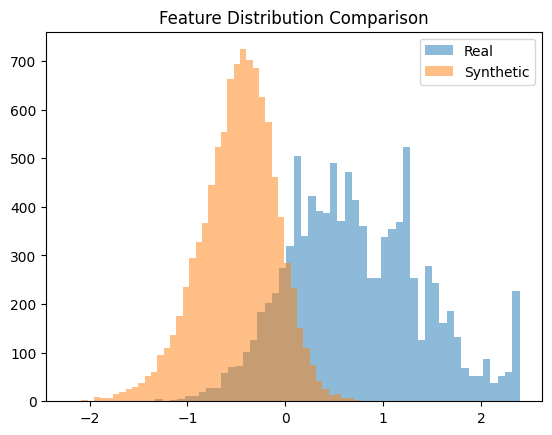

In [65]:
import matplotlib.pyplot as plt

# Plot histograms for a feature
X_back = scaler.inverse_transform(X_train)
plt.hist(X_back[:,3], bins=50, alpha=0.5, label='Real')
plt.hist(df_synthetic['V3'], bins=50, alpha=0.5, label='Synthetic')
plt.legend(loc='upper right')
plt.title('Feature Distribution Comparison')
plt.show()


In [66]:
# Load your dataset
df = pd.read_csv('../data/creditcard_2023.csv')

X_imbalanced = df.drop(['id', 'Class'], axis=1).values  # Drop 'id' and 'Class' columns
y_imbalanced = df['Class'].values
X_train_full = X_imbalanced[y_imbalanced == 1]
df_fraud = pd.DataFrame(X_train_full,columns = df.columns[1:-1])
# Normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_imbalanced = scaler.fit_transform(X_imbalanced)

# X_train = X_imbalanced[y_imbalanced == 1][:10000]

In [73]:
df_fraud.to_csv('../data/dataset_fraud.csv',index=False)

In [75]:
df_fraud.shape

(284315, 29)

In [76]:
rs = df_fraud.sample(n=10)
rs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
84169,-1.565984,1.284620,-1.586612,1.567861,-1.903939,-1.673750,-1.678927,1.801281,-2.046938,-1.950609,...,-1.177948,0.745532,-0.666436,-0.370261,1.221031,0.511979,-0.357569,-1.124826,-1.863844,5856.07
167218,-0.610514,0.307087,-0.674978,1.244369,1.950506,-1.409561,0.212525,-0.409250,-1.115773,-0.545647,...,-0.248571,-0.287890,0.338129,0.806866,-0.471210,1.580244,1.305619,0.469638,-0.904613,16784.08
70886,-0.278051,0.361736,-0.434050,0.810677,-0.236514,0.097062,-0.564116,-0.013646,-0.770372,-0.782907,...,0.337088,0.409235,-0.371129,-0.294893,-0.962626,0.961988,0.284829,1.076588,1.075741,4925.28
142214,-0.327492,0.704960,-1.174344,1.149800,-0.960305,-1.237093,-1.341938,0.486433,-1.015457,-1.775247,...,1.288500,0.592021,0.187173,0.326734,-0.795355,-1.431719,0.485683,2.941272,1.892837,1987.13
271273,-2.245180,2.642829,-2.184509,1.215503,-2.673229,-2.532800,-2.105320,4.164712,-1.160887,-1.294914,...,1.394760,0.556772,-1.385916,-0.949187,0.301514,2.560664,-0.517433,1.950670,0.987596,13837.42
264125,1.250903,-0.194073,0.214693,0.680353,0.330263,0.395446,0.329119,-0.099909,0.508534,0.465338,...,-0.431064,-0.148084,-0.085350,-0.066122,-0.174807,0.332848,0.383973,-0.179706,0.021610,16204.57
64327,-0.535776,0.639249,-0.536234,0.963465,-0.530011,-0.339535,-0.703783,0.318903,-1.401431,-0.920540,...,0.778412,0.295466,-0.417057,-0.030172,-0.388120,-0.560302,-0.156622,1.332377,1.405371,135.93
113687,1.066837,-0.302947,0.523579,-0.238157,0.324453,0.271628,0.483748,-0.190795,0.463582,0.552062,...,-0.212383,-0.145268,-0.226177,-0.154653,-0.852331,1.048180,-0.931652,-0.198117,-0.044135,10533.48
175629,-0.489840,-0.459406,-0.360629,0.264345,-0.631100,0.601000,0.393609,0.055583,-0.565055,-0.556066,...,1.773310,0.328982,0.385435,1.714661,-0.460428,0.259736,1.181399,0.166021,0.477525,10549.74
16223,-0.271813,0.103868,0.048722,0.236608,-0.325071,-0.040153,-0.168697,0.135000,-0.296792,-0.405345,...,0.240353,0.218443,0.708389,0.042805,0.716917,-0.810805,-0.586851,0.536993,0.790881,16601.64


In [13]:
noise = np.random.normal(0, 1, (10, 100))

In [7]:
loaded_model = keras.saving.load_model("generator_model.keras")

In [4]:
import keras

In [19]:
scaler = StandardScaler()
predicted = loaded_model.predict(noise)
synthetic_data = scaler.inverse_transform(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.